!Сообщить об ошибке в описании задания: Если возникают проблемы с открытием <span style="color:red;">вайла</span> выше

Цель: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

Описание задания:
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.
Если возникают проблемы с открытием вайла выше можно воспользоваться альтарнативным документом:
archive.ics.uci.edu...et/2/adult

Задачу классификации нужно решить при помощи модели логистической регрессии и модели опорных векторов.

Этапы работы:

    Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

    Проведите первичный анализ:
    a) проверьте данные на пропуски. Удалите в случае обнаружения.
    * Предложите альтернативный способ работы с пропусками
    b) постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
    c) преобразуйте категориальные признаки

    Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

    Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

    Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

    Сформулируйте выводы по проделанной работе:
    a) кратко опишите какие преобразования были сделаны с данными.
    b) cравните точность двух моделей.
    c) напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
    * Что по вашему мнению нужно сделать, чтобы улучшить результат?

Для получение зачёта по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

Результат: получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.
Форма выполнения: ссылка на Jupyter Notebook, загруженный на GitHub; ссылка на Google Colab; файл с расширением .ipynb.
Инструменты: Jupyter Notebook/Google Colab; GitHub.

<h2>Логистическая регрессия</h2>

In [1]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

In [31]:
data = pd.read_csv('https://raw.githubusercontent.com/EfanRu/Netology_ML_2/refs/heads/main/adult.csv')
data.head(20) # смотрим на первые 5 строк для изучения

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,10.0,United-States,<=50K


Из данных мы можем сделать следующие выводы:
 - искомые значения в столбце income;
 - исходя из жизненного опыта можно выбрать следующие столбцы для обучения:
   - часы работы в неделю, чем больше ты работаешь, тем больше оно тебе нужно и больше зарабатываешь;
   - раса, так как это американские данные;
   - образование, так как хорошая работа доступна только с хорошим образованием;
   - семейное положение и пол, описываются в статусе в отношений, так что можно взять 1 столбец;
   - род деятельности, так как от этого идет прямая зависимость от зарплаты;
   - 5 параметров, думаю нам будет более чем достаточно.
 - столбец income и выбранные столбцы выше не должен быть 

In [3]:
data.info() # изучаем типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22549 entries, 0 to 22548
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              22549 non-null  int64  
 1   workclass        22549 non-null  object 
 2   fnlwgt           22549 non-null  int64  
 3   education        22549 non-null  object 
 4   educational-num  22549 non-null  int64  
 5   marital-status   22549 non-null  object 
 6   occupation       22549 non-null  object 
 7   relationship     22548 non-null  object 
 8   race             22548 non-null  object 
 9   gender           22548 non-null  object 
 10  capital-gain     22548 non-null  float64
 11  capital-loss     22548 non-null  float64
 12  hours-per-week   22548 non-null  float64
 13  native-country   22548 non-null  object 
 14  income           22548 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 2.6+ MB


In [4]:
data[data['income'].isna()].head() # Проверяем пустые или неактуальные данные

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
22548,18,Self-emp-not-inc,60981,11th,7,Never-married,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# удаляем ячейки с отсутствием данных
data = data[~(data['income'].isna())]

In [6]:
data['income'].unique() 

array(['<=50K', '>50K'], dtype=object)

#### Когда искомые данные мы очистили, нужно проверить наши догадки и жизненный опыт на анализе данных.

Тут мы видим, что столбец relationship отлично нам подходит, так как для тех кто не состоит в браке абсолютное большинство не имеют большого дохода.

<Figure size 1200x800 with 0 Axes>

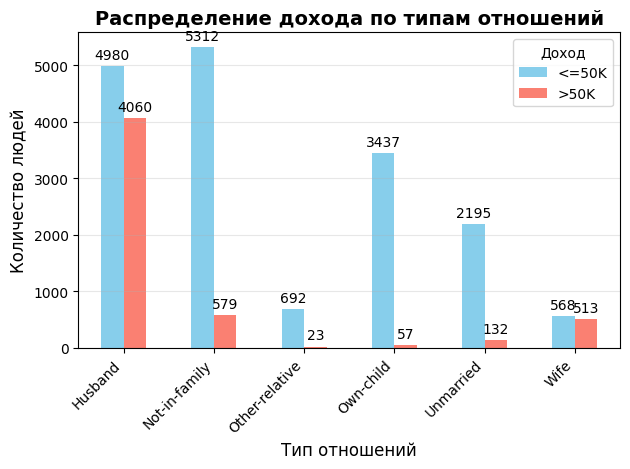

In [7]:
# Создаем таблицу сопряженности
cross_tab = pd.crosstab(data['relationship'], data['income'])

# Построение диаграммы
plt.figure(figsize=(12, 8))
bars = cross_tab.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение дохода по типам отношений', fontsize=14, fontweight='bold')
plt.xlabel('Тип отношений', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.legend(title='Доход', labels=['<=50K', '>50K'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи на столбцы
for container in bars.containers:
    bars.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()

Тут мы видим, что столбец education нам подходит, так как много отношений целевого значения, которое больше другого в разы.

<Figure size 1200x800 with 0 Axes>

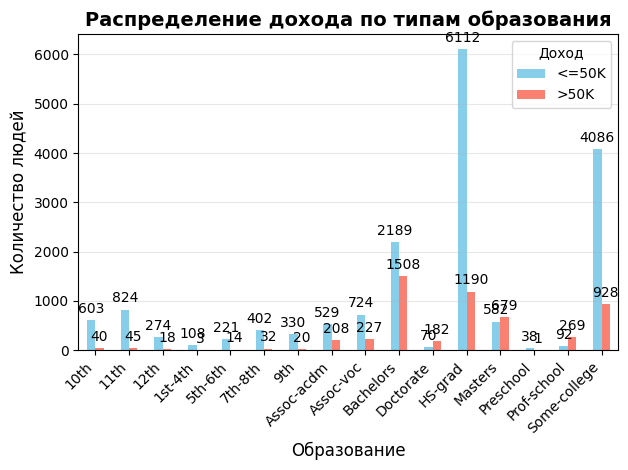

In [8]:
# Создаем таблицу сопряженности
cross_tab = pd.crosstab(data['education'], data['income'])

# Построение диаграммы
plt.figure(figsize=(12, 8))
bars = cross_tab.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение дохода по типам образования', fontsize=14, fontweight='bold')
plt.xlabel('Образование', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.legend(title='Доход', labels=['<=50K', '>50K'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи на столбцы
for container in bars.containers:
    bars.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()

А вот от типа рассы оно зависит очень слабо, так как в максимальной 1 группе, соотношение 3:1, что будет только погрешность вносить.

<Figure size 1200x800 with 0 Axes>

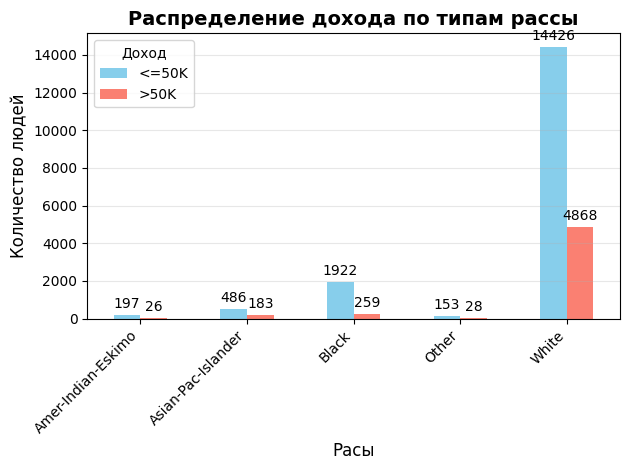

In [9]:
# Создаем таблицу сопряженности
cross_tab = pd.crosstab(data['race'], data['income'])

# Построение диаграммы
plt.figure(figsize=(12, 8))
bars = cross_tab.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение дохода по типам рассы', fontsize=14, fontweight='bold')
plt.xlabel('Расы', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.legend(title='Доход', labels=['<=50K', '>50K'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи на столбцы
for container in bars.containers:
    bars.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()

А вот тут мы видим, что большинство кто работает 40 часов получают < 50к в соотношении 1:4 примерно. Данная метрика нам подходит.

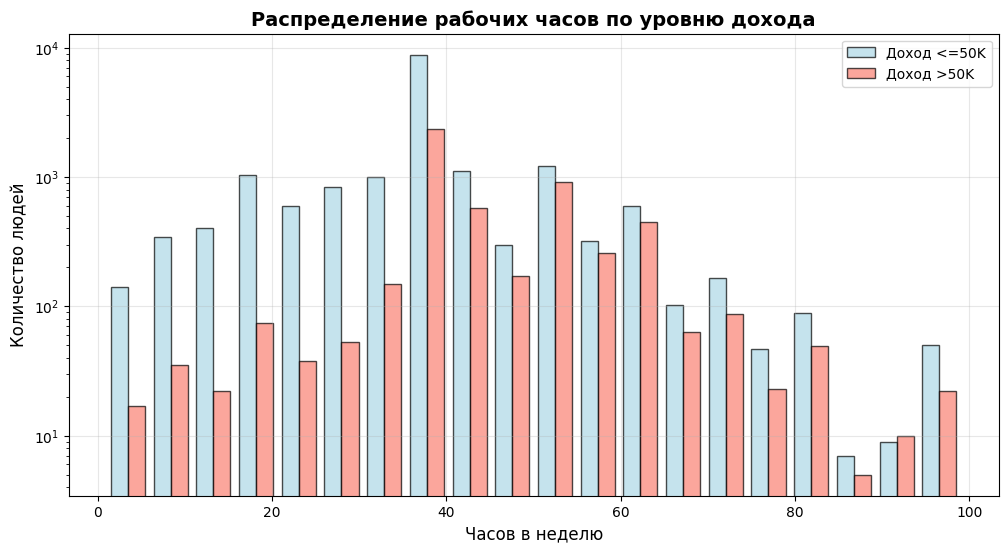

In [10]:
plt.figure(figsize=(12, 6))

# Разделяем данные по доходу
low_income = data[data['income'] == '<=50K']['hours-per-week']
high_income = data[data['income'] == '>50K']['hours-per-week']

plt.hist([low_income, high_income], 
         bins=20, 
         alpha=0.7, 
         label=['Доход <=50K', 'Доход >50K'],
         color=['lightblue', 'salmon'],
         edgecolor='black')

plt.title('Распределение рабочих часов по уровню дохода', fontsize=14, fontweight='bold')
plt.xlabel('Часов в неделю', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.yscale('log')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [11]:
data['occupation'].unique() # Проверяем и анализируем столбцы, по которым будем делать оценку

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

Доходы по видам работы тоже показательны, хотя и есть несколько видов с распределением 1:1

<Figure size 1200x800 with 0 Axes>

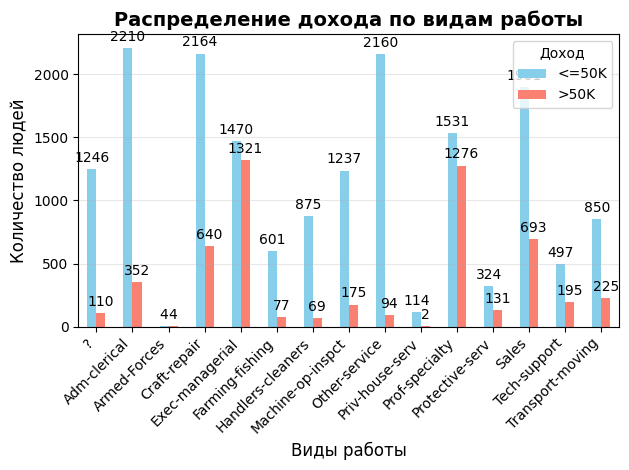

In [12]:
# Создаем таблицу сопряженности
cross_tab = pd.crosstab(data['occupation'], data['income'])

# Построение диаграммы
plt.figure(figsize=(12, 8))
bars = cross_tab.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение дохода по видам работы', fontsize=14, fontweight='bold')
plt.xlabel('Виды работы', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.legend(title='Доход', labels=['<=50K', '>50K'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи на столбцы
for container in bars.containers:
    bars.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

# выбираем 4 признака для построения модели. 4/5 попало по нашим предположениям
selectedColumns = data[['relationship', 'education', 'hours-per-week', 'occupation']]

# столбецы 'relationship', 'education', 'hours-per-week', 'occupation' - категориальная переменнык
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies(selectedColumns, columns=['relationship', 'education', 'hours-per-week', 'occupation'])

X.head()

,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,education_10th,education_11th,education_12th,education_1st-4th,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# целевая переменная (столбец income) снова является категориальной 
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(data['income'])

le.classes_

array(['<=50K', '>50K'], dtype=object)

In [15]:
le.transform(['<=50K', '>50K']) # пример расшифровки

array([0, 1])

In [16]:
# записываем в таргетную переменную y преобразованный столбец sex

Y = pd.Series(data=le.transform(data['income']))
Y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [17]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler # используем стандартизацию
from sklearn.model_selection import train_test_split 

model_1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11) # разделяем тестовые данные как 80/20 %

# обучаем на части датасета (train)

model_1.fit(X_train, Y_train)
predictions = model_1.predict(X_test)

model_score_1 = model_1.score(X_test,Y_test) # получаем оценку нашей модели
print(model_score_1)

0.8281596452328159


82 % это конечно неплохо, но давайте попробуем улучшить его проанализировав остальные столбы, которые не использовали.
capital-gain, capital-loss и native-country выглядят перспективными для этого.

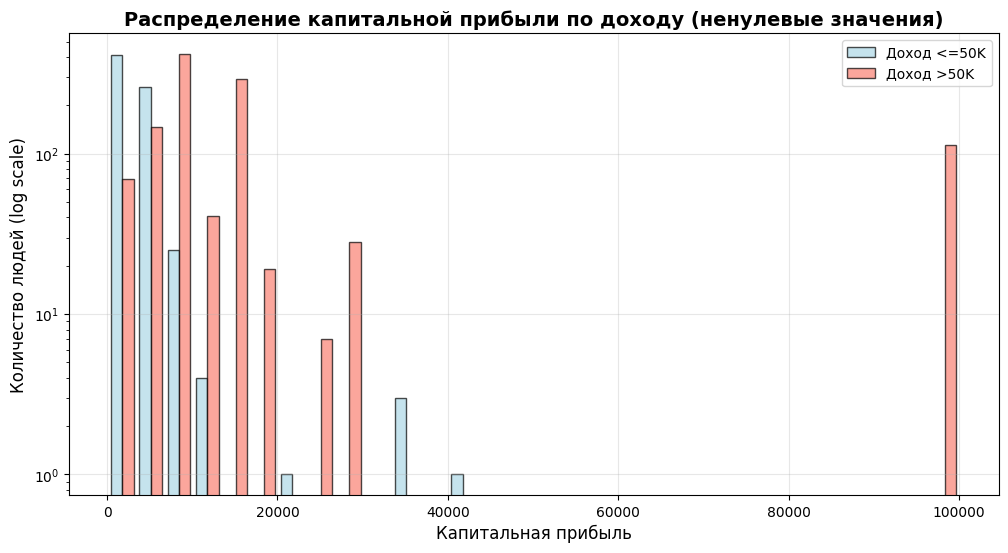

In [18]:
plt.figure(figsize=(12, 6))

# Ненулевые значения по группам дохода
low_income_nonzero = data[(data['income'] == '<=50K') & (data['capital-gain'] > 0)]['capital-gain']
high_income_nonzero = data[(data['income'] == '>50K') & (data['capital-gain'] > 0)]['capital-gain']

plt.hist([low_income_nonzero, high_income_nonzero], 
         bins=30, 
         alpha=0.7, 
         label=['Доход <=50K', 'Доход >50K'],
         color=['lightblue', 'salmon'],
         edgecolor='black')
plt.yscale('log')
plt.title('Распределение капитальной прибыли по доходу (ненулевые значения)', fontsize=14, fontweight='bold')
plt.xlabel('Капитальная прибыль', fontsize=12)
plt.ylabel('Количество людей (log scale)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Выглядит намного лучше чем столбец race.

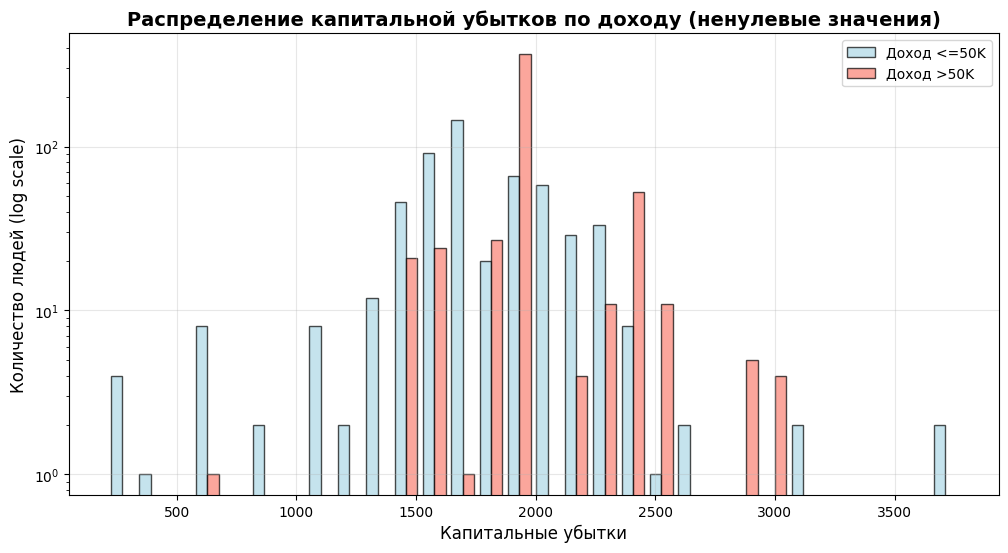

In [19]:
plt.figure(figsize=(12, 6))

# Ненулевые значения по группам дохода
low_income_nonzero = data[(data['income'] == '<=50K') & (data['capital-loss'] > 0)]['capital-loss']
high_income_nonzero = data[(data['income'] == '>50K') & (data['capital-loss'] > 0)]['capital-loss']

plt.hist([low_income_nonzero, high_income_nonzero], 
         bins=30, 
         alpha=0.7, 
         label=['Доход <=50K', 'Доход >50K'],
         color=['lightblue', 'salmon'],
         edgecolor='black')
plt.yscale('log')
plt.title('Распределение капитальной убытков по доходу (ненулевые значения)', fontsize=14, fontweight='bold')
plt.xlabel('Капитальные убытки', fontsize=12)
plt.ylabel('Количество людей (log scale)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Много неоднозначных значений, но есть значения, которые однозначно определяют нам людей с низким доходом. Берем её.

Распределение по странам:
native-country
United-States                 20264
Mexico                          435
?                               396
Philippines                     125
Germany                          97
Canada                           95
Puerto-Rico                      92
El-Salvador                      69
India                            65
China                            65
Cuba                             62
England                          57
Dominican-Republic               48
South                            48
Italy                            45
Japan                            43
Jamaica                          43
Poland                           42
Portugal                         38
Haiti                            38
Guatemala                        36
Vietnam                          32
Columbia                         32
Greece                           30
Iran                             29
Taiwan                           26
Ecuador                

<Figure size 1200x600 with 0 Axes>

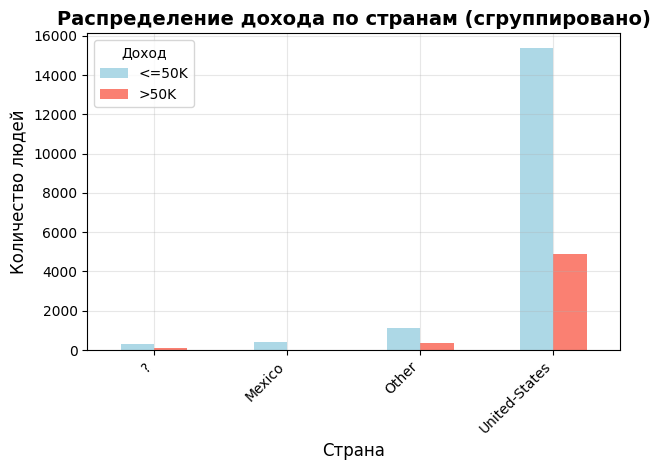

In [20]:
# Анализируем распределение
country_counts = data['native-country'].value_counts()
print("Распределение по странам:")
print(country_counts)

# Определяем порог для группировки (например, страны с < 100 наблюдений)
threshold = 300
main_countries = country_counts[country_counts >= threshold].index
data['country_grouped'] = data['native-country'].where(data['native-country'].isin(main_countries), 'Other')

# Строим диаграмму
cross_tab_country = pd.crosstab(data['country_grouped'], data['income'])

plt.figure(figsize=(12, 6))
cross_tab_country.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Распределение дохода по странам (сгруппировано)', fontsize=14, fontweight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.legend(title='Доход')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Здесь мы видим, что вклад 1 значения вносит основную оценку. Таким образом можно сделать вывод, что она не будет полезна для обучения модели.

In [21]:
# Добавим ещё 2 признака для нашей модели и посмотрим на результат
selectedColumns = data[['relationship', 'education', 'hours-per-week', 'occupation', 'capital-loss', 'capital-gain']]

# столбецы 'relationship', 'education', 'hours-per-week', 'occupation' - категориальная переменнык
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies(selectedColumns, columns=['relationship', 'education', 'hours-per-week', 'occupation'])


model_2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11) # разделяем тестовые данные как 80/20 %

# обучаем на части датасета (train)

model_2.fit(X_train, Y_train)
predictions = model_2.predict(X_test)

model_score_2 = model_2.score(X_test,Y_test) # получаем оценку нашей модели + 2 новых признака
print(model_score_2)
model_diff = model_score_2 - model_score_1
print(f'Разница между 1 и 2 моделью {model_diff}')

0.8416851441241685
Разница между 1 и 2 моделью 0.013525498891352572


Получается, что мы минимально улучшили модель, но может быть какие-то из признаков, что мы выбрали первоначально аффектят нашу модель?
Я попробовал убрать или добавить другие столбцы, но прирост был лишь на 0.1 %, что не имеет смысла из-за растущей ошибки и увеличения сложности вычислений.

## Попробуем метод опорных векторов

In [22]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC()) 
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8414634146341463

In [23]:
svc = SVC()
svc.fit(X_train, Y_train)
svc.score(X_test, Y_test)

0.7991130820399113

Удивительно, но метод опорных векторов тут отработал хуже. Даже с использованием StandardScaler.

In [25]:
svc_poly = SVC(kernel='poly', degree=3)
svc_poly.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8414634146341463

### Итоги
#### a) кратко опишите какие преобразования были сделаны с данными.
Мы очистили данные, где было неопределено итоговое значение income.
Проанализировали столбцы (признаки), которые будут как можно лучше обучать нашу модель и привнесут наибольший вклад в её точность. Воспользовались знаниями "реального мира" и потом проверили их на графиках, чтобы визуально провести анализ.

#### b) cравните точность двух моделей.
Точность логистической регрессии оказалась больше, чем точность метода опорных векторов в данном случае на 0.02 %.

#### c) напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
Конечно о полной точности в 100% речи не идет, но это и не плохой результат. Если верить ИИ, то ожидаемая точность логистической регрессии и метода опорных векторов от 80-85%, а мы в эти цифры попадаем. Следовательно можно считать, что мы справились с задачей.

#### * Что по вашему мнению нужно сделать, чтобы улучшить результат?
Нужно анализировать ошибки. Давайте попробуем сделать это ниже.

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

# Анализ ошибочных предсказаний
Y_pred = model_2.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

# Детальный отчет
print(classification_report(Y_test, Y_pred))

# Анализ, где модель ошибается чаще всего
errors = X_test[Y_pred != Y_test]
correct = X_test[Y_pred == Y_test]

Confusion Matrix:
[[3164  247]
 [ 467  632]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3411
           1       0.72      0.58      0.64      1099

    accuracy                           0.84      4510
   macro avg       0.80      0.75      0.77      4510
weighted avg       0.83      0.84      0.84      4510



Судя по анализу ошибок, мы больше ошибаемся в предсказании тех, кто зарабатывает более 50к. Из тестовых данных нет возможности выделить такие, где бы мы видели явный признак, который влияет на получение более 50к. Следовательно нужно искать другие способы.

In [30]:
# Попробуем создание синтетических примеров
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=11)
X_balanced, Y_balanced = smote.fit_resample(X_train, Y_train)

model_smote = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

model_smote.fit(X_balanced, Y_balanced)

model_smote_score = model_smote.score(X_test,Y_test)
print(model_smote_score)
model_smote_diff = model_score_2 - model_smote_score
print(f'Разница между 2 моделью логистической регрессии и моделью на синтетических данных {model_smote_diff}')

0.8155210643015521
Разница между 2 моделью логистической регрессии и моделью на синтетических данных 0.02616407982261637


Создание синтетических данных сделало хуже. Видимо не подходит или я что-то делаю не так.
Посмотрел ещё способы улучшить модель, но они либо датут незначительный прирост либо будут проходиться нами дальше.
Так что думаю этого пока достаточно.